In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.api as sm 

pd.set_option('display.max_columns',None)

import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv('data/df2.csv')
df.head()

,user_id,product_id,add_to_cart_order,reordered,days_since_prior_order,order_weekend,reorder_ratio,order_dow,order_hour_of_day,avg_pro,u_reorder_ratio,u_order_dow,u_order_hour_of_day,aisle_id_1,aisle_id_10,aisle_id_100,aisle_id_101,aisle_id_102,aisle_id_103,aisle_id_104,aisle_id_105,aisle_id_106,aisle_id_107,aisle_id_108,aisle_id_109,aisle_id_11,aisle_id_110,aisle_id_111,aisle_id_112,aisle_id_113,aisle_id_114,aisle_id_115,aisle_id_116,aisle_id_117,aisle_id_118,aisle_id_119,aisle_id_12,aisle_id_120,aisle_id_121,aisle_id_122,aisle_id_123,aisle_id_124,aisle_id_125,aisle_id_126,aisle_id_127,aisle_id_128,aisle_id_129,aisle_id_13,aisle_id_130,aisle_id_131,aisle_id_132,aisle_id_133,aisle_id_134,aisle_id_14,aisle_id_15,aisle_id_16,aisle_id_17,aisle_id_18,aisle_id_19,aisle_id_2,aisle_id_20,aisle_id_21,aisle_id_22,aisle_id_23,aisle_id_24,aisle_id_25,aisle_id_26,aisle_id_27,aisle_id_28,aisle_id_29,aisle_id_3,aisle_id_30,aisle_id_31,aisle_id_32,aisle_id_33,aisle_id_34,aisle_id_35,aisle_id_36,aisle_id_37,aisle_id_38,aisle_id_39,aisle_id_4,aisle_id_40,aisle_id_41,aisle_id_42,aisle_id_43,aisle_id_44,aisle_id_45,aisle_id_46,aisle_id_47,aisle_id_48,aisle_id_49,aisle_id_5,aisle_id_50,aisle_id_51,aisle_id_52,aisle_id_53,aisle_id_54,aisle_id_55,aisle_id_56,aisle_id_57,aisle_id_58,aisle_id_59,aisle_id_6,aisle_id_60,aisle_id_61,aisle_id_62,aisle_id_63,aisle_id_64,aisle_id_65,aisle_id_66,aisle_id_67,aisle_id_68,aisle_id_69,aisle_id_7,aisle_id_70,aisle_id_71,aisle_id_72,aisle_id_73,aisle_id_74,aisle_id_75,aisle_id_76,aisle_id_77,aisle_id_78,aisle_id_79,aisle_id_8,aisle_id_80,aisle_id_81,aisle_id_82,aisle_id_83,aisle_id_84,aisle_id_85,aisle_id_86,aisle_id_87,aisle_id_88,aisle_id_89,aisle_id_9,aisle_id_90,aisle_id_91,aisle_id_92,aisle_id_93,aisle_id_94,aisle_id_95,aisle_id_96,aisle_id_97,aisle_id_98,aisle_id_99
0,3107,23423,1,1,17.0,0.0,0.592593,1,11,4.037037,0.550459,1,16,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,382,10070,1,1,23.0,0.0,0.482759,1,15,7.310345,0.617925,1,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,382,42450,2,1,23.0,0.0,0.517241,1,15,7.310345,0.617925,1,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,382,33198,3,1,23.0,0.0,0.655172,1,15,7.310345,0.617925,1,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,382,34866,4,1,23.0,0.0,0.620690,1,8,7.310345,0.617925,1,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
#Setting up dual index
df = df.set_index(['user_id','product_id'])

#set up x and y 
y = df['reordered']

X = df.drop(['reordered'],axis=1)

print(f'Shape of y: {y.shape}')
print(f'Shape of x: {X.shape}')

Shape of y: (1544933,)
Shape of x: (1544933, 144)


In [8]:
#sanity check 
y.head()

user_id  product_id
3107     23423         1
382      10070         1
         42450         1
         33198         1
         34866         1
Name: reordered, dtype: int64

In [9]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state= 1)

#sanity check
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (1081453, 144)
Shape of X_test: (463480, 144)
Shape of y_train: (1081453,)
Shape of y_test: (463480,)


### logistic model

In [6]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression().fit(X_train,y_train)


#Score the result
print(f'log score on training data: {"%.4f" % log_reg.score(X_train,y_train)}')
print(f'log score on testing data: {"%.4f" % log_reg.score(X_test, y_test)}')

log score on training data: 0.7844
log score on testing data: 0.7852


### Logistic Regression Model Tunning with cross validation

Based on the simple logistic regression, the prediction result looks ok. I would like to try to improve the accuracy rate for logistic regression with hyperparameter tuning and cross validation.

In [5]:
#using 3 fold cross validation to optimize hyperparameter for c
from sklearn.model_selection import cross_val_score

#creating empty list for cross validation score
cv_score = [] 

#create range for c to optimize
c_range =np.array([.0001,.001,.01,0.1,1,10,100,1000])

#Using for loops to create the iteration for 3 fold
for c in c_range:
    # Instanitate model
    logreg2 = LogisticRegression(C=c, n_jobs=-1)
    #Fit model on 3 folds.
    score = cross_val_score(logreg2, X_train, y_train, cv = 3).mean()
    cv_score.append(score)

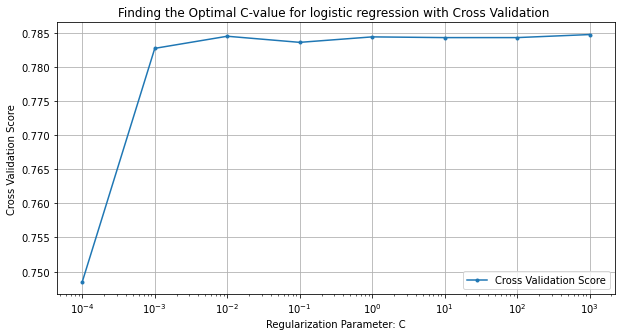

The best model has C =  1000.0


In [9]:
#visulize the cv score
plt.figure(figsize=(10,5))
plt.plot(c_range, cv_score, label='Cross Validation Score', marker='.')
plt.legend()
plt.xscale('log')
plt.xlabel('Regularization Parameter: C')
plt.xticks(c_range)
plt.ylabel('Cross Validation Score')
plt.title('Finding the Optimal C-value for logistic regression with Cross Validation ')
plt.grid()
plt.show()

which_max = np.array(cv_score).argmax()

print("The best model has C = ",c_range[which_max])

In [10]:
# Final Logsitic Regression
from sklearn.linear_model import LogisticRegression
#Score the final logistic regression with C=1
log_reg_f = LogisticRegression(C=1000).fit(X_train, y_train)


print(f'log_reg_f score on training data: {"%.3f" % log_reg_f.score(X_train,y_train)}')
print(f'log_reg_f score on testing data: {"%.3f" % log_reg_f.score(X_test, y_test)}')

log_reg_f score on training data: 0.783
log_reg_f score on testing data: 0.783


### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeClassifier
#Initiate and fit the model
DT_model = DecisionTreeClassifier().fit(X_train, y_train) #max_depth can be defined as integer. Overfitting if
#the max_depth is too large, which is the case of default setting


#Score the result
print(f'dt score on training data: {"%.4f" % DT_model.score(X_train,y_train)}')
print(f'dt score on testing data: {"%.4f" % DT_model.score(X_test, y_test)}')

#get the max_depth from the defalut setting
print(f'dt tree max_depth: {DT_model.tree_.max_depth}')

dt score on training data: 0.9979
dt score on testing data: 0.8087
dt tree max_depth: 69


### Hyperparameter tunning for Decision Tree

Based on the simple decision tree result, we can see that there is clearly over fitting in the training set. Therefore, I will use cross validation to tunning the hyperparameter. 

In decision tree, I can adjust the max_depth and splitter for the hyperparameter optimization. I will use the gridsearchcv with cross validation to optimize the decision tree.


In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
# Setting up depth of tree from 1 to 80 
tree_depth = list(range(1,80,10))


#setting up splitter option 
splitter = ['best','random']

#create a pipeline of dt model

pipe_dt = Pipeline([('model_dt', DecisionTreeClassifier())])

#create parameter_grid
param_grid_dt = [{'model_dt': [DecisionTreeClassifier()],
                 'model_dt__max_depth':tree_depth,
                  'model_dt__splitter':splitter}]

#Create grid search with 3-fold cross validation
grid_dt = GridSearchCV(pipe_dt, param_grid_dt, n_jobs=-1, cv=3, verbose=10)

#fit the grid search in training set
fittedgrid_dt = grid_dt.fit(X_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  9.0min
[Parallel(n_jobs=-1)]: Done  46 out of  48 | elapsed: 13.1min remaining:   34.1s
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed: 13.8min finished


In [14]:
# View The Best Parameters
print('Best Max_depth:', fittedgrid_dt.best_estimator_.get_params()['model_dt__max_depth'])
print('Best Criteria:', fittedgrid_dt.best_estimator_.get_params()['model_dt__criterion'])
print('Best Splitter:', fittedgrid_dt.best_estimator_.get_params()['model_dt__splitter'])
print(); print(fittedgrid_dt.best_estimator_.get_params()['model_dt'])

Best Max_depth: 11
Best Criteria: gini
Best Splitter: best

DecisionTreeClassifier(max_depth=11)


In [15]:
#Final Decision Tree model with max_depth=11

dt_f = DecisionTreeClassifier(max_depth=11, splitter='best', criterion='gini').fit(X_train, y_train)

#score the training and testing
print(f'DT_2 score on training: {"%0.4f" % dt_f.score(X_train, y_train)}')
print(f'DT_2 score on testing: {"%0.4f" % dt_f.score(X_test, y_test)}')


DT_2 score on training: 0.8504
DT_2 score on testing: 0.8470


### Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier().fit(X_train, y_train)

#Score the result
print(f'rf score on training data: {"%.4f" % rf.score(X_train,y_train)}')
print(f'rf score on testing data: {"%.4f" % rf.score(X_test, y_test)}')

rf score on training data: 0.9978
rf score on testing data: 0.8436


In [20]:
#Get the default setting random forest 
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [23]:
# use cv to narrow down n_estimators

#create empty list for rf cv score
cv_score_rf = []

#create range for n_estimators
estimators = [10,50,100,150,200,250]

#Using for loops to create the iteration for 3 fold
for n in estimators:
    #Initiate randomforest
    rf2 = RandomForestClassifier(n_estimators=n, n_jobs=-1)
    #Fit model on 3 folds.
    score_rf = cross_val_score(rf2, X_train, y_train, cv = 3).mean()
    cv_score_rf.append(score_rf)

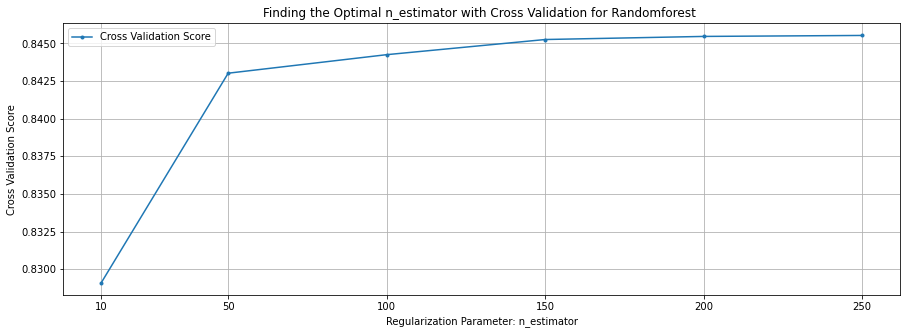

The best model has number of trees  250


In [24]:
#visulize the cv score
plt.figure(figsize=(15,5))
plt.plot(estimators, cv_score_rf, label='Cross Validation Score', marker='.')
plt.legend()
plt.xlabel('Regularization Parameter: n_estimator')
plt.xticks(estimators)
plt.ylabel('Cross Validation Score')
plt.title('Finding the Optimal n_estimator with Cross Validation for Randomforest ')
plt.grid()
plt.show()

which_max = np.array(cv_score_rf).argmax()

print("The best model has number of trees ",estimators[which_max])

Based on above optimal n_esitmator result we can see that the best n_estimator would be 250 different trees. However, the accurcy score with 50 different trees and 250 different trees does not have too many difference (less than 0.25%). Therefore, to save some computing power I will use 50 trees to optimize my other hyperparameters. 

In [25]:
#Using Gridsearchcv to find other best parameters with 450 trees

# Setting up depth of tree each from 1 to 60
depth = [1,10,20,30,40,50,60,None]

#setting up slit range 
split = [2,10,15,20,25,30]

#create a pipeline of rf model

pipe_rf = Pipeline([('model_rf', RandomForestClassifier())])

#Create parameter_grid

param_grid_rf = [{'model_rf': [RandomForestClassifier()],
                 'model_rf__max_depth':depth,
                 'model_rf__n_estimators':[50],
                 'model_rf__min_samples_split':split}]

#Create grid search with 3-fold cross validation
grid_rf = GridSearchCV(pipe_rf, param_grid_rf, n_jobs=-1, cv=3, verbose=10)


In [26]:
#fit the grid search in training set
fittedgrid_rf = grid_rf.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed: 35.5min
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed: 53.3min
[Parallel(n_jobs=-1)]: Done  77 tasks      | elapsed: 79.6min
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed: 102.7min
[Parallel(n_jobs=-1)]: Done 105 tasks      | elapsed: 134.9min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed: 161.7min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed: 195.6min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed: 206.4min finished


In [27]:
# View The Best Parameters
print('Best Max_depth:', fittedgrid_rf.best_estimator_.get_params()['model_rf__max_depth'])
print('Best Number of Estimators:', fittedgrid_rf.best_estimator_.get_params()['model_rf__n_estimators'])
print('Best Min Samples split:', fittedgrid_rf.best_estimator_.get_params()['model_rf__min_samples_split'])
print(); print(fittedgrid_rf.best_estimator_.get_params()['model_rf'])

Best Max_depth: 40
Best Number of Estimators: 50
Best Min Samples split: 15

RandomForestClassifier(max_depth=40, min_samples_split=15, n_estimators=50)


In [28]:
#Score the testing set with the hyperparameter

rf2 = RandomForestClassifier(n_estimators=50, n_jobs=-1, max_depth=40, min_samples_split=15).fit(X_train, y_train)

print(f'rf2 score on training data: {"%.4f" %rf2.score(X_train, y_train)}')
print(f'rf2 score on testing data: {"%.4f" % rf2.score(X_test, y_test)}')


rf2 score on training data: 0.8990
rf2 score on testing data: 0.8502


### Model Evaluation

In [29]:
#import classification_report package
from sklearn.metrics import classification_report

In [31]:
#get y_predict on test data for 3 different models
log_predict = log_reg_f.predict(X_test)
dt_predict = dt_f.predict(X_test)
rf_predict = rf2.predict(X_test)


# Confusion Matrix for logistic regression
print('Confusion Matrix for Logistic Regression')
print(classification_report(y_test, log_predict))

print('  ')
# Confusion Matrix for Decision Tree
print('Confusion Matrix for Decision Tree')
print(classification_report(y_test, dt_predict))


print('  ')
# Confusion Matrix for Random Forest
print('Confusion Matrix for Random Forest')
print(classification_report(y_test, rf_predict))

Confusion Matrix for Logistic Regression
              precision    recall  f1-score   support

           0       0.75      0.71      0.73    189940
           1       0.80      0.84      0.82    273540

    accuracy                           0.78    463480
   macro avg       0.78      0.77      0.77    463480
weighted avg       0.78      0.78      0.78    463480

  
Confusion Matrix for Decisition Tree
              precision    recall  f1-score   support

           0       0.86      0.75      0.80    189940
           1       0.84      0.92      0.88    273540

    accuracy                           0.85    463480
   macro avg       0.85      0.83      0.84    463480
weighted avg       0.85      0.85      0.84    463480

  
Confusion Matrix for Random Forest
              precision    recall  f1-score   support

           0       0.85      0.77      0.81    189940
           1       0.85      0.91      0.88    273540

    accuracy                           0.85    463480
   macro 

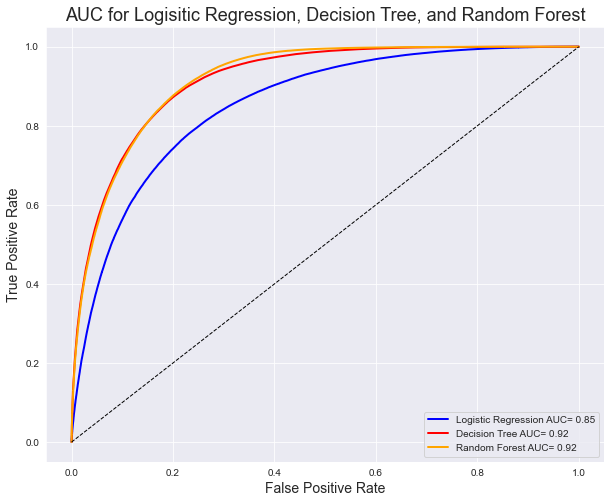

Area under curve (AUC- log):0.8535
Area under Curve (AUC- dt): 0.9161
Area under Curve (AUC- rf): 0.9187


In [90]:
# ROC Curve for three different models
from sklearn.metrics import roc_curve, roc_auc_score

#Get the predicted postive case only for logistic regression
log_proba = log_reg_f.predict_proba(X_test)[:,1] 
fprs, tprs, thresholds = roc_curve(y_test, log_proba)
roc_auc_log = roc_auc_score(y_test, log_proba)

#Get the predicted postive case only for decision tree
dt_proba = dt_f.predict_proba(X_test)[:,1] 
fprs_dt, tprs_dt, thresholds_dt = roc_curve(y_test, dt_proba)
roc_auc_dt = roc_auc_score(y_test, dt_proba)

#Get the predicted postive case only for random forest
rf_proba = rf2.predict_proba(X_test)[:,1] 
fprs_rf, tprs_rf, thresholds_rf = roc_curve(y_test, rf_proba)
roc_auc_rf = roc_auc_score(y_test, rf_proba)

#plot the roc curve
sns.set_style('darkgrid')
plt.figure(figsize=(10,8))
plt.plot(fprs, tprs, color ='blue', lw=2, label='Logistic Regression AUC= %0.2f' % roc_auc_log)
plt.plot(fprs_dt, tprs_dt, color ='red', lw=2, label='Decision Tree AUC= %0.2f' % roc_auc_dt)
plt.plot(fprs_rf, tprs_rf, color ='orange', lw=2, label='Random Forest AUC= %0.2f' % roc_auc_rf)
plt.plot([0,1],[0,1], color ='black', lw=1, linestyle='--')
plt.xlabel('False Positive Rate', fontsize= 14)
plt.ylabel('True Positive Rate',fontsize=14)
plt.title('AUC for Logisitic Regression, Decision Tree, and Random Forest',fontsize=18)
plt.legend(loc ='best')
plt.show()

print(f'Area under curve (AUC- log):{"%.4f" %roc_auc_log}')
print(f'Area under Curve (AUC- dt): {"%.4f" %roc_auc_dt}')
print(f'Area under Curve (AUC- rf): {"%.4f" %roc_auc_rf}')


Based on the overall result of those models, Decision tree and Random Forest seem to have a similar result. However, Random Forest would took too much time to compute. Therefore, Decision Tree will be choosen as my final model. 

###  Decision Tree Feature Importance

In [50]:
#get feature importance from decision tree model
fea_impo = dt_f.feature_importances_

#combine feature importance with column headings
importance = pd.DataFrame({'feature':X.columns,'importance_score':fea_impo}).reset_index(drop=True).sort_values(by='importance_score',
                                                                                                               ascending=False)


,feature,importance_score
3,reorder_ratio,0.497648
7,u_reorder_ratio,0.301369
1,days_since_prior_order,0.155462
6,avg_pro,0.018824
0,add_to_cart_order,0.010620
...,...,...
62,aisle_id_25,0.000000
54,aisle_id_18,0.000000
51,aisle_id_15,0.000000
50,aisle_id_14,0.000000


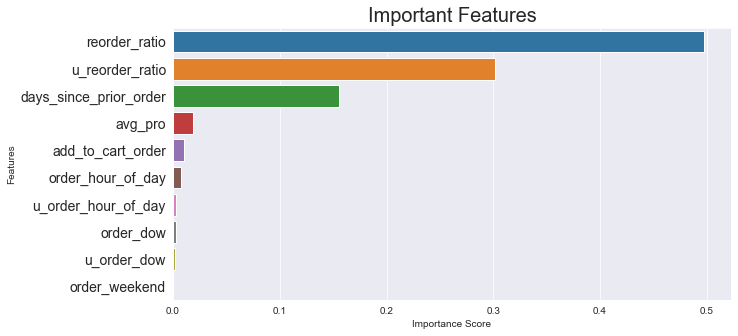

In [61]:
#plot out the feature importance
top_10_feature = importance[importance['importance_score']>0][:10]
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
sns.barplot(x='importance_score',y='feature',data=top_10_feature)
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.yticks(fontsize=14)
plt.title('Important Features', fontsize=20)
plt.show()